<a href="https://colab.research.google.com/github/Makssadilov2702/decision_tree/blob/main/%D0%94%D0%97_2_2_%D0%BC%D0%B5%D0%B4_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
pip install -U scikit-learn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SMADdataset/Sleep_health_and_lifestyle_3.csv', sep=';')
df.head()

,Person ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,SAD,DAD,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,2,27,2,"6,1",6,42,6,3,126,83,77,4200,1
1,2,2,28,5,"6,2",6,60,8,1,125,80,75,10000,1
2,3,2,28,5,"6,2",6,60,8,1,125,80,75,10000,1
3,4,2,28,10,"5,9",4,30,8,2,140,90,85,3000,2
4,5,2,28,10,"5,9",4,30,8,2,140,90,85,3000,2


In [ ]:
print(df.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration',
       'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level',
       'BMI_Category', 'SAD', 'DAD', 'Heart_Rate', 'Daily_Steps',
       'Sleep_Disorder'],
      dtype='object')


In [ ]:
df['Sleep_Duration'] = df['Sleep_Duration'].str.replace(',', '.')
df.head()

,Person ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,SAD,DAD,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,2,27,2,6.1,6,42,6,3,126,83,77,4200,1
1,2,2,28,5,6.2,6,60,8,1,125,80,75,10000,1
2,3,2,28,5,6.2,6,60,8,1,125,80,75,10000,1
3,4,2,28,10,5.9,4,30,8,2,140,90,85,3000,2
4,5,2,28,10,5.9,4,30,8,2,140,90,85,3000,2


In [ ]:
print(df.dtypes)

Person ID                   int64
Gender                      int64
Age                         int64
Occupation                  int64
Sleep_Duration             object
Quality_of_Sleep            int64
Physical_Activity_Level     int64
Stress_Level                int64
BMI_Category                int64
SAD                         int64
DAD                         int64
Heart_Rate                  int64
Daily_Steps                 int64
Sleep_Disorder              int64
dtype: object


In [ ]:
cols_to_convert = [col for col in df.columns if col != 'Sleep_Duration']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

In [ ]:
df['Sleep_Duration'] = pd.to_numeric(df['Sleep_Duration'], errors='coerce').astype(float)

In [ ]:
X = df.drop(['Person ID', 'BMI_Category'], axis=1)
y = df['BMI_Category'].values
X.shape

(374, 12)

In [ ]:
missing_values_mask = df.isna()
print("Отсутствующие значения:")
print(missing_values_mask)
count_missing_values = missing_values_mask.sum()
print("\nКоличество отсутствующих значений:")
print(count_missing_values)

for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nЗаполненный датафрейм:")
print(df)

Отсутствующие значения:
     Person ID  Gender    Age  Occupation  Sleep_Duration  Quality_of_Sleep  \
0        False   False  False       False           False             False   
1        False   False  False       False           False             False   
2        False   False  False       False           False             False   
3        False   False  False       False           False             False   
4        False   False  False       False           False             False   
..         ...     ...    ...         ...             ...               ...   
369      False   False  False       False           False             False   
370      False   False  False       False           False             False   
371      False   False  False       False           False             False   
372      False   False  False       False           False             False   
373      False   False  False       False           False             False   

     Physical_Activity_Leve

<ipython-input-11-85833f6cad9d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

hgbr_model = HistGradientBoostingRegressor(max_iter=100, random_state=0)
hgbr_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


HistGradientBoostingRegressor(random_state=0)

In [ ]:
pip install shap

In [ ]:
import shap
explainer = shap.TreeExplainer(hgbr_model)
shap_values = explainer.shap_values(X_train)
feature_importance = np.mean(np.abs(shap_values), axis=0)
sorted_idxs = np.argsort(-feature_importance)
for idx in sorted_idxs:
    print(f"{X_train.columns[idx]}: {feature_importance[idx]:.3f}")

DAD: 0.300
Sleep_Duration: 0.227
Sleep_Disorder: 0.166
Age: 0.155
SAD: 0.118
Occupation: 0.117
Heart_Rate: 0.049
Quality_of_Sleep: 0.026
Daily_Steps: 0.021
Physical_Activity_Level: 0.018
Gender: 0.013
Stress_Level: 0.011


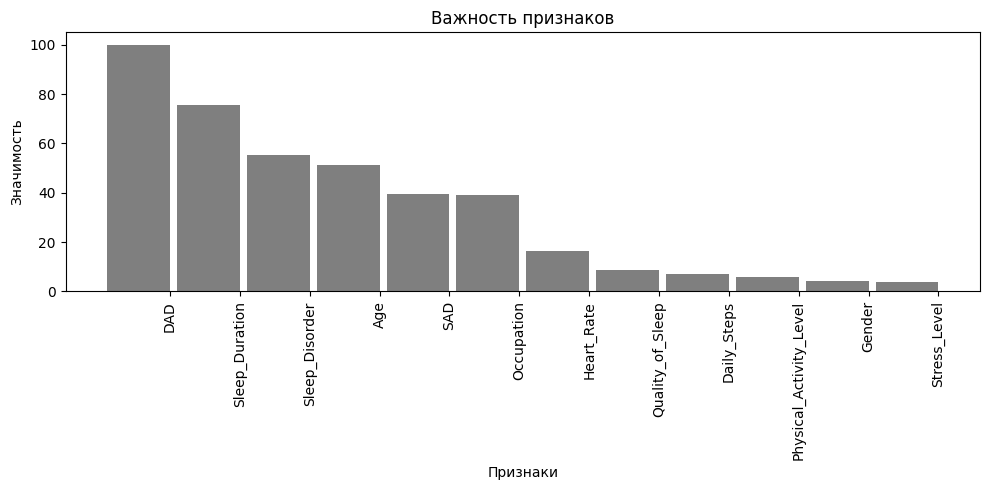

In [ ]:
feat_names = X.columns
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
index = np.arange(len(feat_names))
bar_width = 0.9

plt.figure(figsize=(10, 5))
plt.bar(index, feature_importance[sorted_idx], width=bar_width, color='black', alpha=0.5)
plt.xlabel('Признаки')
plt.ylabel('Значимость')
plt.title('Важность признаков')
plt.xticks(index + bar_width / 2, np.array(feat_names)[sorted_idx], rotation='vertical')  # Смещаем метки
plt.tight_layout()
plt.show()

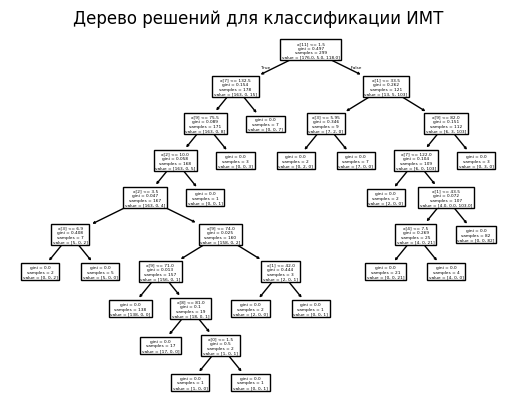

In [ ]:
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
tree.plot_tree(cl)
plt.title("Дерево решений для классификации ИМТ")
plt.savefig('decision_tree.png', dpi=1200)

In [ ]:
y_pred = cl.predict(X_test)
conf_matr=confusion_matrix(y_test, y_pred)
print(conf_matr)
print(classification_report(y_test, y_pred))

[[37  0  3]
 [ 1  4  0]
 [ 1  0 29]]
              precision    recall  f1-score   support

         1.0       0.95      0.93      0.94        40
         2.0       1.00      0.80      0.89         5
         3.0       0.91      0.97      0.94        30

    accuracy                           0.93        75
   macro avg       0.95      0.90      0.92        75
weighted avg       0.94      0.93      0.93        75



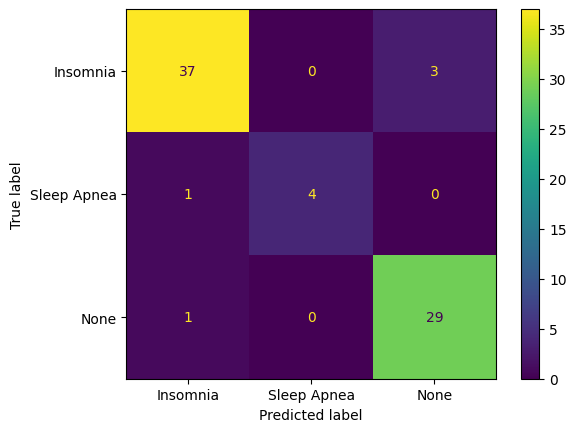

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels= ["Insomnia", "Sleep Apnea", "None"])
disp.plot()
plt.show()

In [ ]:
prob=cl.predict_proba(X_test)
print('score= ',round(cl.score(X_test, y_test),3))
print('roc_auc= ',round(roc_auc_score(y_test, prob, multi_class='ovr'),3))

score=  0.933
roc_auc=  0.928


In [ ]:
pred=cl.predict(X_train)
print('accuracy= ',round(accuracy_score(y_train, pred),2))

accuracy=  1.0
